### CLASSIFICATION MODELS ON IRIS DATASET

### Classification Models
    Logistic Regression
    Lasso Classifier
    Random Forest Classifier
    Ada Boost Classifier
    

#### Importing Libraries

In [6]:
# Exploration, Statistical And Visualization
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling And Prediction
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler




# import warnings
import warnings
warnings.filterwarnings('ignore')

#### Data Reading And Cleaning

In [21]:
# Load and view the 1st 5 rows of the dataset
iris = pd.read_csv('iris.csv',header=None)
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
# More information about the Dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# Show the shape of Dataset
iris.shape

(149, 5)

In [38]:
iris_dist = iris.drop(columns= 4 , axis = 0)
iris_dist.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
pd.DataFrame

#### Check for missing values

In [11]:

iris.isnull().sum()

5.1            0
3.5            0
1.4            0
0.2            0
Iris-setosa    0
dtype: int64

In [14]:
iris.isna().sum()

5.1            0
3.5            0
1.4            0
0.2            0
Iris-setosa    0
dtype: int64

In [19]:
a= range (0, len(iris.columns))

In [20]:
print(a)

range(0, 5)


In [ ]:
# Describtion of Dataset
1. 

In [33]:
# View the target_name, its content and no of rows/cols
print(iris.target_names)
print(iris.target)
print(iris.target.shape)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150,)


In [34]:
# Let us describe the iris data
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [35]:
# Let us show various graphical relationships 

In [4]:
sns.pairplot(data='iris')

TypeError: 'data' must be pandas DataFrame object, not: <class 'str'>

In [36]:
#Let us convert the iris data into dataframe for ease of navigation
iris_df=pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [37]:
#Convert the target to a series
target_ds=pd.Series(iris.target)
target_ds.head()

0    0
1    0
2    0
3    0
4    0
dtype: int32

In [38]:
iris_df['output'] = target_ds
print(iris_df.head())
print(iris_df.tail())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   output  
0       0  
1       0  
2       0  
3       0  
4       0  
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0        

In [39]:
# Split the iris_df into independent(x) and dependent(y) variables
X= iris_df.drop('output', axis=1)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:
iris_df['output'].value_counts


<bound method IndexOpsMixin.value_counts of 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: output, Length: 150, dtype: int32>

In [41]:
y=iris_df['output']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: output, dtype: int32

In [47]:
# Split both X and y into train and test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)
print(X.shape,x_train.shape,x_test.shape)
print(y.shape,y_train.shape,y_test.shape)

(150, 4) (120, 4) (30, 4)
(150,) (120,) (30,)


In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [50]:
# import the necessary model
from sklearn.linear_model import LogisticRegression

# Create your model
reg=LogisticRegression()

In [51]:
# Train the model
reg.fit(x_train,y_train)

LogisticRegression()

In [55]:
# Make prediction
pred =reg.predict(x_test)

In [57]:
print(x_test.std())

0.9978990241923363


(30,)


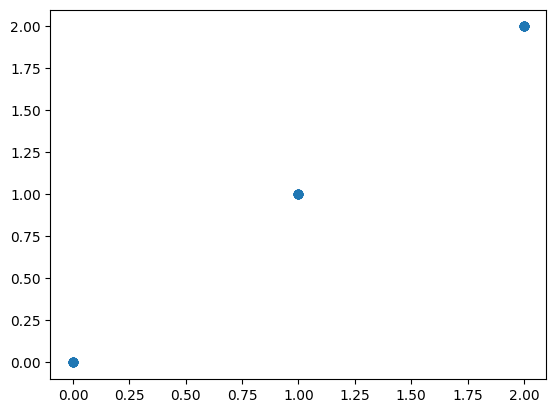

In [58]:
plt.scatter(pred,y_test)
print(pred.shape)

In [59]:
# Evalaute your model
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
mse = mean_squared_error(y_test,pred)

In [63]:
print(mse)
print(np.sqrt(mse))
print(r2_score(y_test,pred))

0.0
0.0
1.0
